##Question 3, Part I

In [1]:


from scipy.io import loadmat
#file_path = '/content/149.mat'
file_path = 'C:/Users/lenovo/Documents/GitHub/KNTU-ML/Assignment 1/Assignment1_code/149.mat'
matdata = loadmat(file_path)
type(matdata)



dict

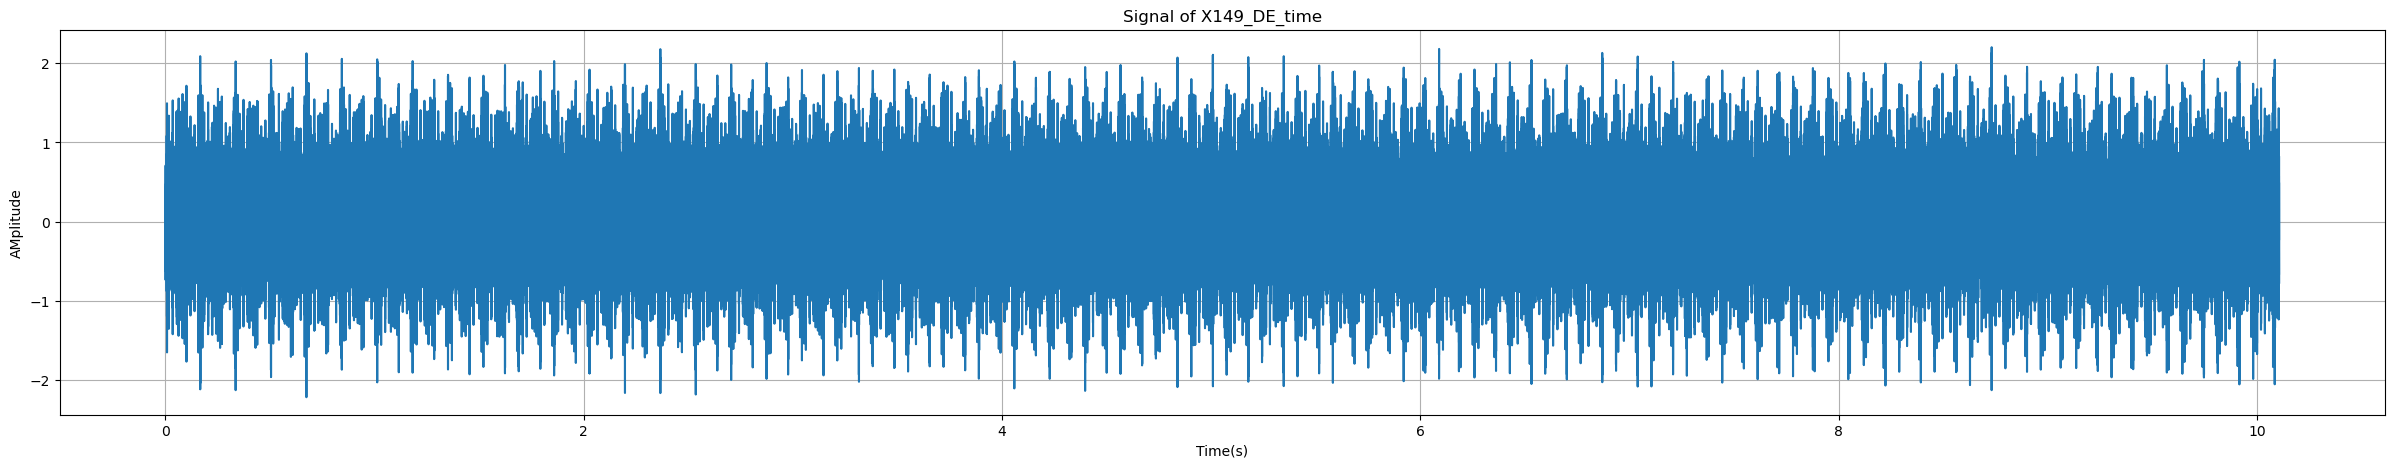

In [2]:
matdata.keys()

DE_time = matdata['X149_DE_time']
len(DE_time)

import numpy as np
import matplotlib.pyplot as plt


fs = 48000 #KHz


time = np.linspace(0, len(DE_time)/fs , len(DE_time))
plt.figure(figsize=(30,5))
plt.plot(time, DE_time)
plt.xlabel("Time(s)")
plt.ylabel("AMplitude")
plt.title("Signal of X149_DE_time")
plt.grid(True)
plt.show()






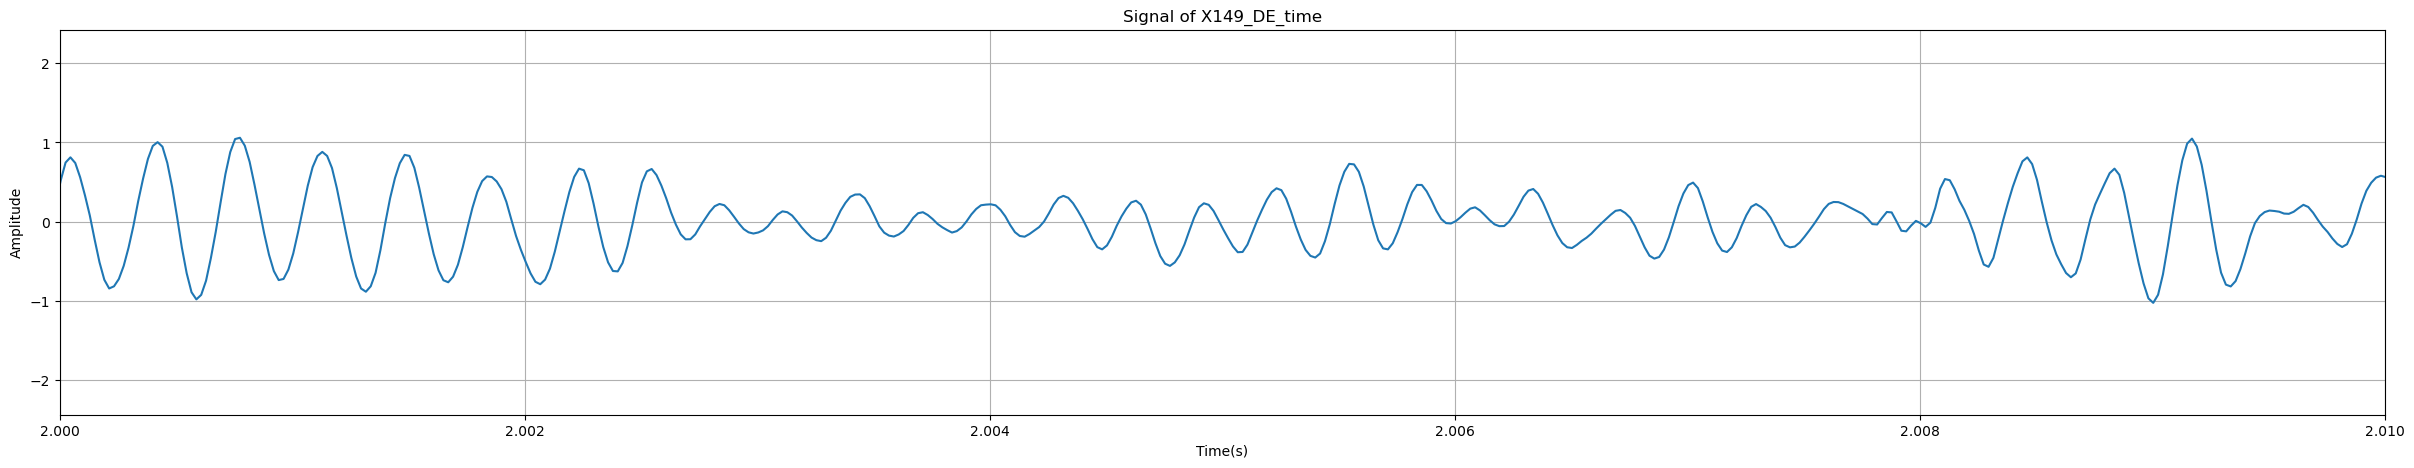

In [3]:
time = np.linspace(0, len(DE_time)/fs, len(DE_time))
plt.figure(figsize=(30, 5))
plt.plot(time, DE_time)
plt.xlabel("Time(s)")
plt.xlim(2, 2.01)
plt.ylabel("Amplitude")
plt.title("Signal of X149_DE_time")
plt.grid(True)
plt.show()

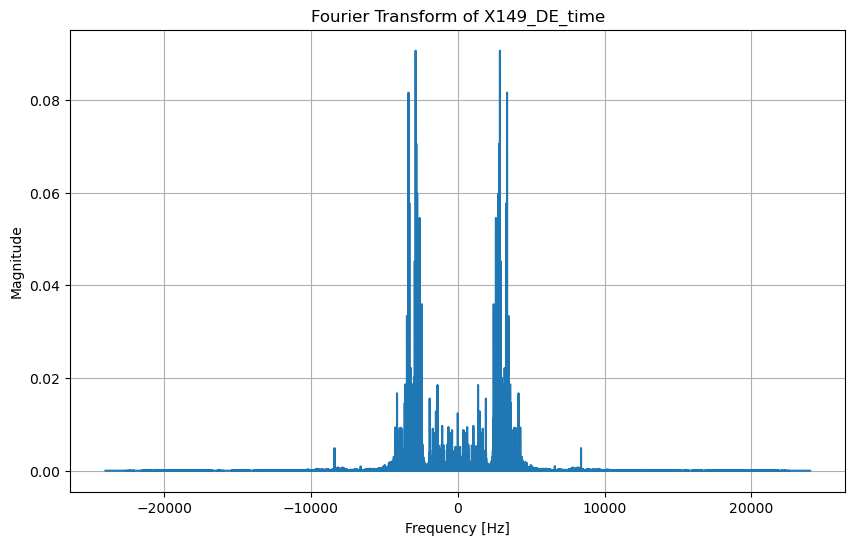

Dominant Frequency: -2871.901439797798 Hz


In [5]:


# Fourier Transform
def plot_fourier_transform(signal, time, title="Fourier Transform"):
    dt = time[1] - time[0]  # Time step
    fs = 1 / dt             # Sampling frequency
    n = len(signal)         # Number of samples

    # Perform the Fourier Transform
    spectrum = np.fft.fft(signal)
    freq = np.fft.fftfreq(n, dt)  # Frequency axis

    # Shift zero frequency to the center
    spectrum_shifted = np.fft.fftshift(spectrum)
    freq_shifted = np.fft.fftshift(freq)

    # Plot the Magnitude Spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(freq_shifted, np.abs(spectrum_shifted) / n)
    plt.title(title)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

    # Store the dominant frequency
    dominant_freq = freq_shifted[np.argmax(np.abs(spectrum_shifted))]
    print(f"Dominant Frequency: {dominant_freq} Hz")

    return freq_shifted, spectrum_shifted, dominant_freq

# Call the Fourier Transform function
_, _, dominant_freq = plot_fourier_transform(DE_time.flatten(), time, title="Fourier Transform of X149_DE_time")



In [6]:
num_sections = len(DE_time) // 128
signal_trimmed = DE_time[:num_sections * 128]
sections = signal_trimmed.reshape(-1,128)
sections

import pandas as pd

df = pd.DataFrame(sections)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.043809,-0.076770,-0.046938,0.047773,0.167727,0.274955,0.367580,0.422029,0.435798,0.377177,...,-0.389902,-0.170022,0.064045,0.267862,0.423698,0.480024,0.425993,0.279962,0.065505,-0.157296
1,-0.325023,-0.423072,-0.433086,-0.368206,-0.252007,-0.097423,0.046521,0.157922,0.194847,0.154375,...,0.342964,0.417857,0.427453,0.383435,0.298320,0.165641,0.003129,-0.159591,-0.286638,-0.360696
2,-0.424324,-0.480441,-0.534890,-0.527171,-0.422446,-0.267236,-0.077396,0.080317,0.207364,0.347136,...,-1.197035,-0.995304,-0.658390,-0.236987,0.196098,0.579534,0.836548,0.943567,0.898924,0.714925
3,0.437049,0.122457,-0.162929,-0.376968,-0.496087,-0.505684,-0.408052,-0.230937,-0.031918,0.119745,...,-0.467924,-0.577030,-0.568060,-0.467716,-0.310002,-0.172525,-0.074893,-0.007510,0.033587,0.063210
4,0.070512,0.050902,0.021279,-0.001252,0.012726,0.079065,0.162094,0.224262,0.239073,0.226139,...,0.288098,0.331490,0.328361,0.275790,0.173151,0.057369,-0.031084,-0.089287,-0.114947,-0.112235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,0.027329,0.048399,0.064254,0.100344,0.133931,0.135183,0.112861,0.083655,0.078231,0.094503,...,-0.208198,-0.258892,-0.338791,-0.408678,-0.413684,-0.335871,-0.167310,0.021905,0.179409,0.304787
3785,0.435798,0.557003,0.607697,0.528006,0.316470,0.037968,-0.245540,-0.447689,-0.566599,-0.605610,...,0.584749,0.376968,0.177532,0.009805,-0.096380,-0.158130,-0.152289,-0.091791,-0.002086,0.116407
3786,0.207364,0.233232,0.182747,0.094294,0.015646,-0.039428,-0.071555,-0.064462,0.003964,0.126212,...,0.031710,0.059664,0.083446,0.114113,0.144988,0.209658,0.300406,0.382601,0.439344,0.444977
3787,0.419943,0.363408,0.273286,0.138938,-0.038802,-0.232398,-0.399498,-0.490872,-0.485239,-0.374882,...,0.050694,-0.135183,-0.308542,-0.419943,-0.436632,-0.334410,-0.135183,0.112652,0.351726,0.530092


In [7]:
df.loc[df.index%13==0].iloc[1:11]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
13,-0.277667,0.322102,0.879940,1.327628,1.531237,1.458013,1.150514,0.702825,0.194012,-0.353812,...,0.030875,0.115573,0.165015,0.184625,0.191300,0.206529,0.218420,0.211536,0.188588,0.158548
26,0.286429,0.347345,0.362574,0.307708,0.193178,0.050276,-0.095963,-0.208824,-0.277667,-0.286846,...,-0.363199,-0.764993,-1.028474,-1.087095,-0.960048,-0.735369,-0.474809,-0.178158,0.160217,0.486700
39,-0.511942,-0.508187,-0.456450,-0.353186,-0.217586,-0.040263,0.135391,0.302701,0.439135,0.490038,...,0.366120,0.394492,0.378011,0.313132,0.221967,0.120580,0.012726,-0.087618,-0.158965,-0.202566
52,-0.411390,-0.685510,-0.883486,-0.950034,-0.900593,-0.748303,-0.479190,-0.158130,0.190257,0.537185,...,0.055909,-0.085741,-0.182538,-0.258474,-0.296442,-0.288306,-0.227599,-0.136017,-0.049025,0.004381
65,0.087827,0.000417,-0.120371,-0.199645,-0.233649,-0.215500,-0.160425,-0.097423,-0.020653,0.017732,...,0.764367,0.785228,0.751641,0.641701,0.468342,0.240951,-0.012934,-0.276207,-0.524876,-0.713465
78,-0.201314,-0.254928,-0.308125,-0.321685,-0.246583,-0.112026,0.017106,0.139355,0.230729,0.295817,...,0.030875,0.108271,0.172942,0.216543,0.226765,0.214248,0.180661,0.145196,0.119119,0.083655
91,1.259828,0.853237,0.325440,-0.211327,-0.677583,-1.012202,-1.204754,-1.221652,-1.069154,-0.755814,...,-0.346302,-0.563262,-0.671742,-0.628350,-0.448940,-0.162929,0.196724,0.531135,0.781682,0.915196
104,-0.257431,-0.110358,0.064045,0.207155,0.308542,0.330864,0.284343,0.202983,0.093668,-0.012934,...,-0.616458,-0.323145,0.013769,0.363199,0.667569,0.878479,0.959631,0.888493,0.669447,0.340252
117,0.436006,0.467298,0.437675,0.367580,0.237196,0.071972,-0.099927,-0.262647,-0.344007,-0.347136,...,0.229477,0.096589,-0.053823,-0.198602,-0.289767,-0.324397,-0.295817,-0.219881,-0.114530,0.039846
130,0.241785,0.230311,0.157296,0.063002,-0.035047,-0.101387,-0.107020,-0.052988,0.052780,0.165641,...,-0.060707,-0.036299,-0.011057,0.036508,0.102013,0.175654,0.244080,0.263898,0.239908,0.178992


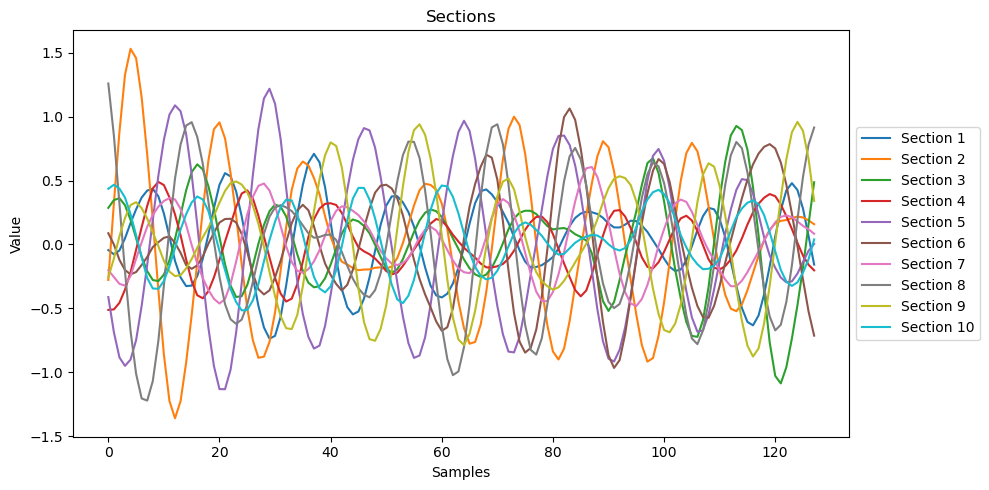

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
    var = df.iloc[13*i]
    var = np.array(var).reshape(var.shape[0], -1)  # Ensure it's 2D
    plt.plot(np.arange(len(var)), var.flatten(), label=f"Section {i+1}")  # Assign labels for each plot
    plt.title("Sections")
    plt.xlabel("Samples")
    plt.ylabel("Value")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))  # Places the legend outside the plot on the right
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [9]:
class Statistics:
    def __init__(self, signal):
        self.signal = np.array(signal)

    def mymean(self):
        return np.mean(self.signal)

    def mystddev(self):
        return np.std(self.signal)

    def myRMS(self):
        return np.sqrt(np.mean(np.square(self.signal)))

    def main(signal):
        stats = Statistics(signal)
        print("Mean:", stats.mymean())
        print("Standard Deviation:", stats.mystddev())
        print("RMS:", stats.myRMS())

In [10]:
Statistics.main(df.iloc[5])

Mean: -0.007943682692307693
Standard Deviation: 0.46182885898271664
RMS: 0.4618971715479475


In [11]:
df['Mean'] = df.apply(lambda row: Statistics(row.values).mymean(), axis = 1)
df['Standard Deviation'] = df.apply(lambda row: Statistics(row.values).mystddev(), axis = 1)
df['RMS'] = df.apply(lambda row: Statistics(row.values).myRMS(), axis = 1)
df


,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,Mean,Standard Deviation,RMS
0,-0.043809,-0.076770,-0.046938,0.047773,0.167727,0.274955,0.367580,0.422029,0.435798,0.377177,...,0.267862,0.423698,0.480024,0.425993,0.279962,0.065505,-0.157296,0.024675,0.319016,0.319962
1,-0.325023,-0.423072,-0.433086,-0.368206,-0.252007,-0.097423,0.046521,0.157922,0.194847,0.154375,...,0.383435,0.298320,0.165641,0.003129,-0.159591,-0.286638,-0.360696,-0.001723,0.186792,0.186800
2,-0.424324,-0.480441,-0.534890,-0.527171,-0.422446,-0.267236,-0.077396,0.080317,0.207364,0.347136,...,-0.236987,0.196098,0.579534,0.836548,0.943567,0.898924,0.714925,0.024771,0.733092,0.733507
3,0.437049,0.122457,-0.162929,-0.376968,-0.496087,-0.505684,-0.408052,-0.230937,-0.031918,0.119745,...,-0.467716,-0.310002,-0.172525,-0.074893,-0.007510,0.033587,0.063210,-0.019232,0.424132,0.424565
4,0.070512,0.050902,0.021279,-0.001252,0.012726,0.079065,0.162094,0.224262,0.239073,0.226139,...,0.275790,0.173151,0.057369,-0.031084,-0.089287,-0.114947,-0.112235,0.032449,0.296034,0.297794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,0.027329,0.048399,0.064254,0.100344,0.133931,0.135183,0.112861,0.083655,0.078231,0.094503,...,-0.408678,-0.413684,-0.335871,-0.167310,0.021905,0.179409,0.304787,-0.007334,0.189121,0.189262
3785,0.435798,0.557003,0.607697,0.528006,0.316470,0.037968,-0.245540,-0.447689,-0.566599,-0.605610,...,0.009805,-0.096380,-0.158130,-0.152289,-0.091791,-0.002086,0.116407,0.037373,0.578780,0.579976
3786,0.207364,0.233232,0.182747,0.094294,0.015646,-0.039428,-0.071555,-0.064462,0.003964,0.126212,...,0.114113,0.144988,0.209658,0.300406,0.382601,0.439344,0.444977,0.013042,0.378577,0.378800
3787,0.419943,0.363408,0.273286,0.138938,-0.038802,-0.232398,-0.399498,-0.490872,-0.485239,-0.374882,...,-0.419943,-0.436632,-0.334410,-0.135183,0.112652,0.351726,0.530092,-0.000130,0.361806,0.361806


In [63]:
df.to_csv("dataset.csv", index=False)

#Question 3, Part II

In [12]:
from sklearn import datasets
import pandas as pd

# Load dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [13]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=43) 

In [14]:
X_train = pd.DataFrame(X_train)
X_train.rename(columns={0:'Sepal Length', 1:"Sepal Width",2:"Petal Length", 3:"Petal Width"},inplace=True)

X_test = pd.DataFrame(X_test)
X_test.rename(columns={0:'Sepal Length', 1:"Sepal Width",2:"Petal Length", 3:"Petal Width"},inplace=True)

y_train = pd.DataFrame(y_train)
y_train.rename(columns={0:'Iris Type'},inplace=True)

y_test = pd.DataFrame(y_test)
y_test.rename(columns={0:'Iris Type'},inplace=True)


In [15]:
y_test

,Iris Type
0,0
1,0
2,2
3,1
4,2
5,0
6,2
7,1
8,1
9,1


In [16]:
y_train

,Iris Type
0,1
1,1
2,1
3,1
4,1
...,...
100,1
101,0
102,0
103,1


In [17]:
X_train

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.7,2.8,4.5,1.3
1,5.5,2.6,4.4,1.2
2,5.7,2.6,3.5,1.0
3,6.7,3.1,4.4,1.4
4,6.3,3.3,4.7,1.6
...,...,...,...,...
100,6.6,2.9,4.6,1.3
101,5.1,3.7,1.5,0.4
102,5.0,3.3,1.4,0.2
103,5.6,2.9,3.6,1.3


In [18]:
X_test

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,4.8,3.1,1.6,0.2
1,5.1,3.5,1.4,0.2
2,6.0,3.0,4.8,1.8
3,5.8,2.7,4.1,1.0
4,7.6,3.0,6.6,2.1
5,5.1,3.4,1.5,0.2
6,5.7,2.5,5.0,2.0
7,6.1,2.8,4.0,1.3
8,5.5,2.4,3.7,1.0
9,4.9,2.4,3.3,1.0


In [20]:
Train_df = pd.concat([X_train,y_train], axis=1)
Test_df = pd.concat([X_test,y_test], axis=1)

In [21]:
Train_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Type
0,5.7,2.8,4.5,1.3,1
1,5.5,2.6,4.4,1.2,1
2,5.7,2.6,3.5,1.0,1
3,6.7,3.1,4.4,1.4,1
4,6.3,3.3,4.7,1.6,1
...,...,...,...,...,...
100,6.6,2.9,4.6,1.3,1
101,5.1,3.7,1.5,0.4,0
102,5.0,3.3,1.4,0.2,0
103,5.6,2.9,3.6,1.3,1


In [22]:
Test_df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Type
0,4.8,3.1,1.6,0.2,0
1,5.1,3.5,1.4,0.2,0
2,6.0,3.0,4.8,1.8,2
3,5.8,2.7,4.1,1.0,1
4,7.6,3.0,6.6,2.1,2
5,5.1,3.4,1.5,0.2,0
6,5.7,2.5,5.0,2.0,2
7,6.1,2.8,4.0,1.3,1
8,5.5,2.4,3.7,1.0,1
9,4.9,2.4,3.3,1.0,1


In [23]:
X_train

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.7,2.8,4.5,1.3
1,5.5,2.6,4.4,1.2
2,5.7,2.6,3.5,1.0
3,6.7,3.1,4.4,1.4
4,6.3,3.3,4.7,1.6
...,...,...,...,...
100,6.6,2.9,4.6,1.3
101,5.1,3.7,1.5,0.4
102,5.0,3.3,1.4,0.2
103,5.6,2.9,3.6,1.3


In [25]:
temporary_train = Train_df
temporary_train["is train"] = 1
temporary_test = Test_df
temporary_test["is train"] = 0

In [26]:
Dataset = pd.concat([temporary_train,temporary_test],ignore_index=True)

In [27]:
Dataset

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Type,is train
0,5.7,2.8,4.5,1.3,1,1
1,5.5,2.6,4.4,1.2,1,1
2,5.7,2.6,3.5,1.0,1,1
3,6.7,3.1,4.4,1.4,1,1
4,6.3,3.3,4.7,1.6,1,1
...,...,...,...,...,...,...
145,5.6,2.5,3.9,1.1,1,0
146,5.8,2.7,5.1,1.9,2,0
147,5.5,2.4,3.8,1.1,1,0
148,6.7,3.0,5.0,1.7,1,0


In [28]:
import seaborn as sns

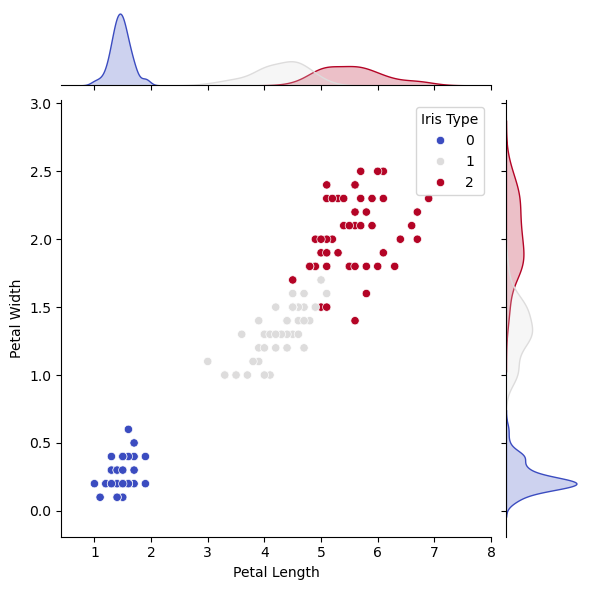

In [29]:
sns.jointplot(x=Dataset["Petal Length"], y=Dataset["Petal Width"], kind="scatter", hue=Dataset["Iris Type"],palette="coolwarm")

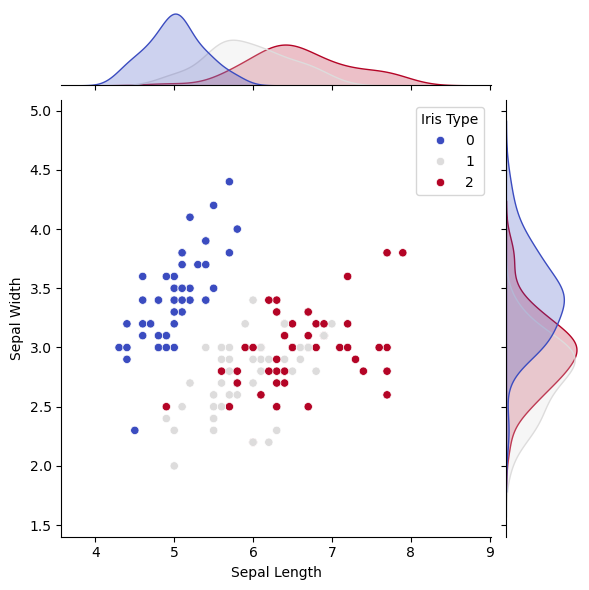

In [30]:
sns.jointplot(x=Dataset["Sepal Length"], y=Dataset["Sepal Width"], kind="scatter", hue=Dataset["Iris Type"],palette="coolwarm")

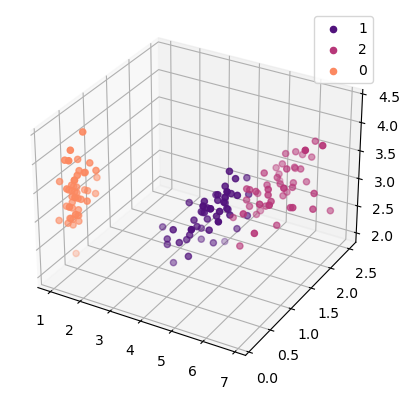

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Assuming Dataset is a pandas DataFrame and 'Species' is the column for flower types
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Create a color palette based on flower species
species = Dataset["Iris Type"].unique()
palette = sns.color_palette("magma", len(species))  # You can choose any color palette here

# Loop through each species and plot them with different colors
for i, species_name in enumerate(species):
    subset = Dataset[Dataset["Iris Type"] == species_name]
    ax.scatter(subset["Petal Length"], subset["Petal Width"], subset["Sepal Width"], 
               label=species_name, c=[palette[i]], marker='o')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [34]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(Dataset,
                    x="Petal Length",
                    y="Petal Width",
                    z="Sepal Width",
                    color="Iris Type",  # Different colors for each species
                    color_discrete_sequence=px.colors.sequential.Magma,  # Magma color palette
                    title="3D Scatter Plot of Iris Dataset")

# Customize markers
fig.update_traces(marker=dict(size=5,  # Marker size
                              opacity=0.8,  # Transparency
                              line=dict(width=10, color='black')),  # Black border around each point
                  selector=dict(mode='markers'))

# Add interactive layout settings
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40),  # Remove margins
                  scene=dict(aspectmode='cube'))  # Equal scaling on all axes

# Show plot
fig.show()


In [35]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(Dataset,
                    x="Sepal Length",
                    y="Petal Width",
                    z="Sepal Width",
                    color="Iris Type",  # Different colors for each species
                    color_discrete_sequence=px.colors.sequential.Magma,  # Magma color palette
                    title="3D Scatter Plot of Iris Dataset")

# Customize markers
fig.update_traces(marker=dict(size=5,  # Marker size
                              opacity=0.8,  # Transparency
                              line=dict(width=10, color='black')),  # Black border around each point
                  selector=dict(mode='markers'))

# Add interactive layout settings
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40),  # Remove margins
                  scene=dict(aspectmode='cube'))  # Equal scaling on all axes

# Show plot
fig.show()


Text(0.5, 1.0, 'Correlation Heatmap')

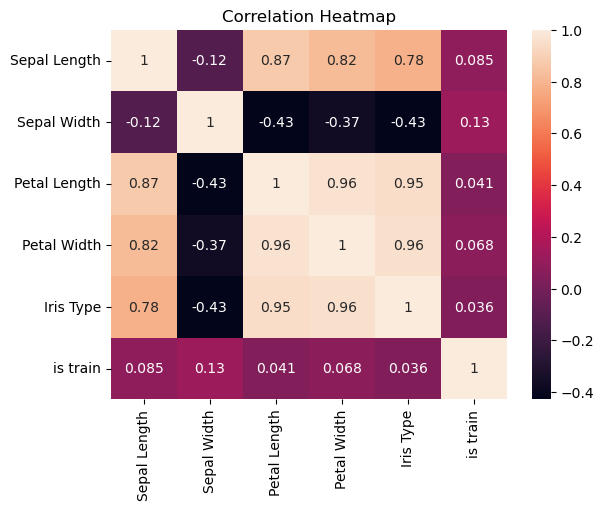

In [36]:
sns.heatmap(Dataset.corr(),annot=True )
plt.title("Correlation Heatmap")

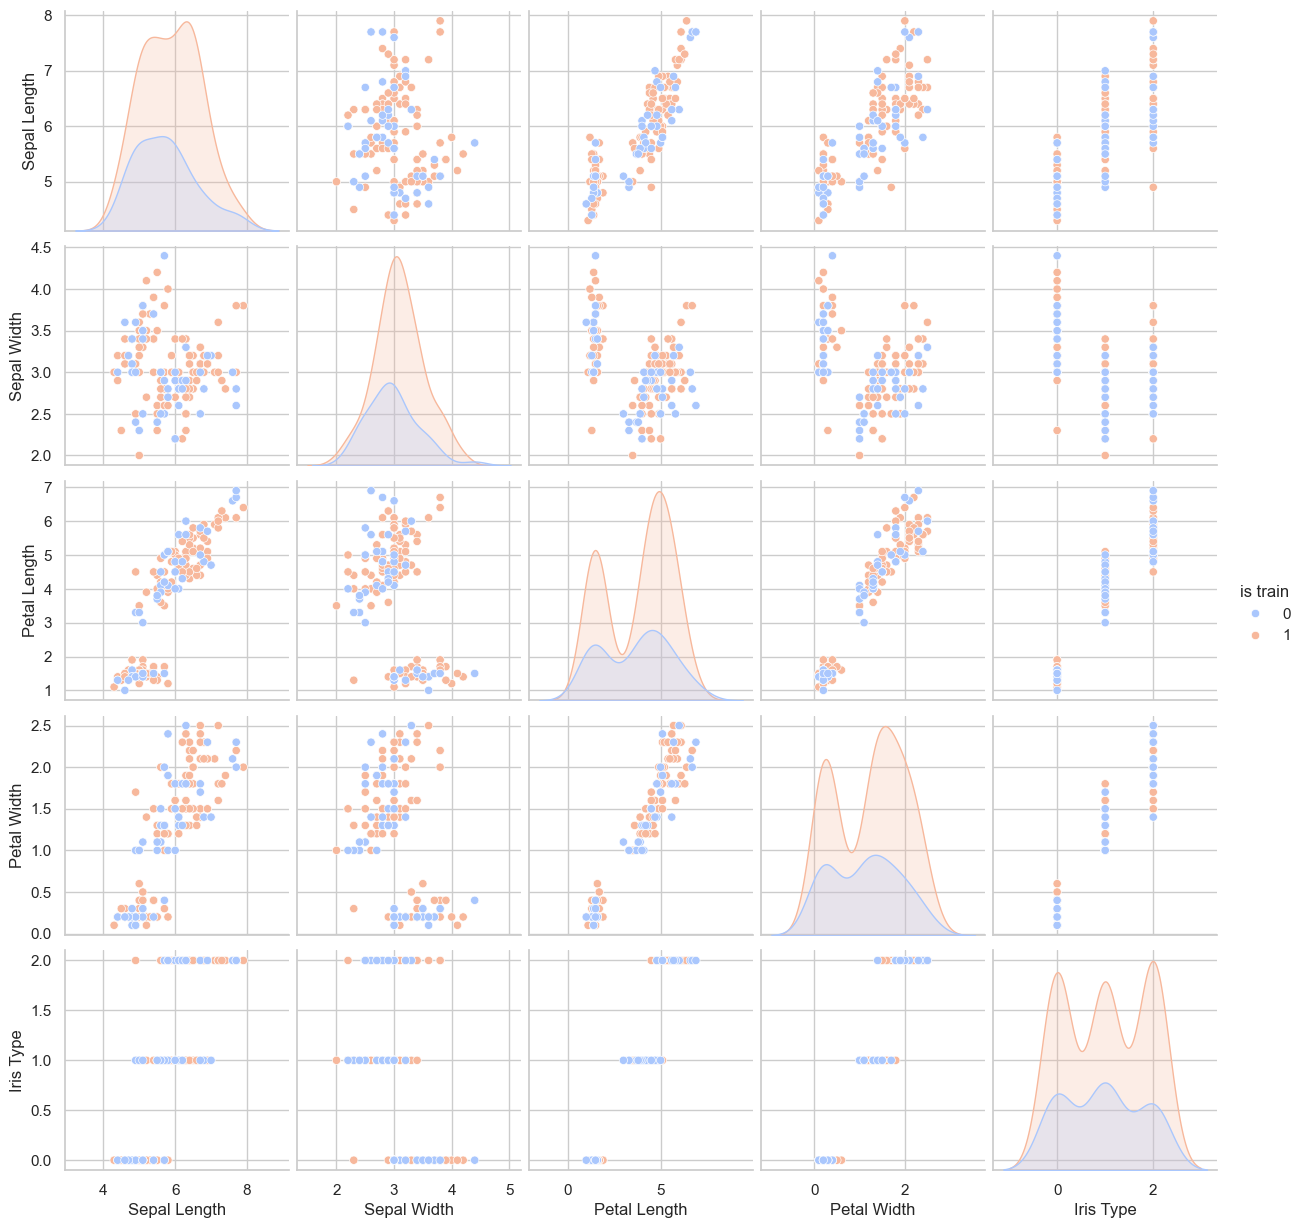

In [205]:
sns.pairplot(Dataset,hue='is train',palette='coolwarm')

In [208]:
Dataset["Petal Length"]

0      4.5
1      4.4
2      3.5
3      4.4
4      4.7
      ... 
145    3.9
146    5.1
147    3.8
148    5.0
149    1.0
Name: Petal Length, Length: 150, dtype: float64

In [210]:
bins = 3  # Number of categories
labels = ["Short", "Medium", "Tall"]  # Custom labels
Dataset["Discrit Petal Lemgth"]=pd.cut(Dataset["Petal Length"], bins=bins, labels=labels)

In [211]:
Dataset

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Type,is train,Discrit Petal Lemgth
0,5.7,2.8,4.5,1.3,1,1,Medium
1,5.5,2.6,4.4,1.2,1,1,Medium
2,5.7,2.6,3.5,1.0,1,1,Medium
3,6.7,3.1,4.4,1.4,1,1,Medium
4,6.3,3.3,4.7,1.6,1,1,Medium
...,...,...,...,...,...,...,...
145,5.6,2.5,3.9,1.1,1,0,Medium
146,5.8,2.7,5.1,1.9,2,0,Tall
147,5.5,2.4,3.8,1.1,1,0,Medium
148,6.7,3.0,5.0,1.7,1,0,Tall


In [216]:
Dataset[Dataset["Iris Type"] ==0].describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Type,is train
count,50.00000,50.000000,50.000000,50.000000,50.0,50.00000
mean,5.00600,3.428000,1.462000,0.246000,0.0,0.70000
std,0.35249,0.379064,0.173664,0.105386,0.0,0.46291
min,4.30000,2.300000,1.000000,0.100000,0.0,0.00000
25%,4.80000,3.200000,1.400000,0.200000,0.0,0.00000
50%,5.00000,3.400000,1.500000,0.200000,0.0,1.00000
75%,5.20000,3.675000,1.575000,0.300000,0.0,1.00000
max,5.80000,4.400000,1.900000,0.600000,0.0,1.00000
